In [2]:
import pandas as pd
import geopandas as gpd
import os

# Load commune data and final demand

In [3]:
filename = os.path.join('..', '..', 'Structured', 'Admin', 'communes_2021_treated.geojson')
communes = gpd.read_file(filename)
communes['COMMUNE'] = communes['COMMUNE'].astype(str).str.zfill(6)
communes['DISTRICT'] = communes['DISTRICT'].astype(str).str.zfill(4)
communes['PROVINCE'] = communes['PROVINCE'].astype(str).str.zfill(2)
print(communes.shape)
communes.head()

(1634, 8)


,ORDER_,COMMUNE,COMMUNE_NA,DISTRICT,DISTRICT_N,PROVINCE,PROVINCE_N,geometry
0,1,160801,Ta Veaeng Leu,1608,Ta Veaeng,16,Ratanak Kiri,"MULTIPOLYGON (((107.45191 14.52510, 107.45251 ..."
1,2,190303,Santepheap,1903,Siem Pang,19,Stung Treng,"MULTIPOLYGON (((106.34129 14.44058, 106.34341 ..."
2,3,190305,Tma Kaev,1903,Siem Pang,19,Stung Treng,"MULTIPOLYGON (((106.18691 14.34771, 106.18886 ..."
3,4,160802,Ta Veaeng Kraom,1608,Ta Veaeng,16,Ratanak Kiri,"MULTIPOLYGON (((106.99350 14.35621, 106.99428 ..."
4,5,220405,Ou Smach,2204,Krong Samraong,22,Otdar Meanchey,"MULTIPOLYGON (((103.63281 14.40535, 103.63494 ..."


In [39]:
final_demand = pd.read_csv(os.path.join('..', '..', 'Structured', 'InputOutputTable', 'final_demand.csv'))
final_demand.head()

,sector,final_demand
0,CRO,2.211792e+09
1,LIV,4.431070e+08
2,FOR,1.607528e+08
3,FIS,8.893704e+08
4,MIN,1.196348e+08


# Rename

In [40]:
communes = communes.rename(columns={
    'COMMUNE': "commune_code", 
    'COMMUNE_NA': 'commune_name', 
    'PROVINCE': 'province_code',
    "PROVINCE_N": "province_name",
    'DISTRICT': 'district_code', 
    'DISTRICT_N': 'district_name', 
    'nb_househo': 'nb_households', 
    'pop_densit': 'pop_density', 
    'ratio_urba': 'ratio_urban'
}).drop(columns='ORDER_')
communes.head()

,commune_code,commune_name,district_code,district_name,province_code,province_name,geometry
0,160801,Ta Veaeng Leu,1608,Ta Veaeng,16,Ratanak Kiri,"MULTIPOLYGON (((107.45191 14.52510, 107.45251 ..."
1,190303,Santepheap,1903,Siem Pang,19,Stung Treng,"MULTIPOLYGON (((106.34129 14.44058, 106.34341 ..."
2,190305,Tma Kaev,1903,Siem Pang,19,Stung Treng,"MULTIPOLYGON (((106.18691 14.34771, 106.18886 ..."
3,160802,Ta Veaeng Kraom,1608,Ta Veaeng,16,Ratanak Kiri,"MULTIPOLYGON (((106.99350 14.35621, 106.99428 ..."
4,220405,Ou Smach,2204,Krong Samraong,22,Otdar Meanchey,"MULTIPOLYGON (((103.63281 14.40535, 103.63494 ..."


# Add area

In [41]:
communes['area'] = communes.to_crs('EPSG:32648').area / 1e6
communes.head()

,commune_code,commune_name,district_code,district_name,province_code,province_name,geometry,area
0,160801,Ta Veaeng Leu,1608,Ta Veaeng,16,Ratanak Kiri,"MULTIPOLYGON (((107.45191 14.52510, 107.45251 ...",1714.310412
1,190303,Santepheap,1903,Siem Pang,19,Stung Treng,"MULTIPOLYGON (((106.34129 14.44058, 106.34341 ...",1961.869253
2,190305,Tma Kaev,1903,Siem Pang,19,Stung Treng,"MULTIPOLYGON (((106.18691 14.34771, 106.18886 ...",375.492518
3,160802,Ta Veaeng Kraom,1608,Ta Veaeng,16,Ratanak Kiri,"MULTIPOLYGON (((106.99350 14.35621, 106.99428 ...",558.445828
4,220405,Ou Smach,2204,Krong Samraong,22,Otdar Meanchey,"MULTIPOLYGON (((103.63281 14.40535, 103.63494 ...",21.097258


# Add largest villages

In [42]:
filename = os.path.join('..', '..', 'Structured', 'Villages', 'villages_with_pop_ag_jobs.geojson')
villages_full_info = gpd.read_file(filename)
villages_full_info.head()

,FID_1,village_code,village,TOTPOP,commune_code,commune,VP_Village,village_nb,commune_nb,district_code,...,TEL,TRA,TRL,TRR,TRW,VET,VID,WAS,jobs,geometry
0,433,01070101,Kouk Samraong Lech,923.0,010701,Banteay Chhmar,861770,01,01,0107,...,0.0,0.0,0.0,9.052499,0.0,0.0,0.0,0.0,17.104999,POINT (103.11352 14.10649)
1,434,01070102,Kbal Tonsaong,1113.0,010701,Banteay Chhmar,861770,02,01,0107,...,0.0,0.0,0.0,28.079784,0.0,0.0,0.0,0.0,54.159569,POINT (103.04462 14.09835)
2,435,01070103,Banteay Chhmar Cheung,1378.0,010701,Banteay Chhmar,861770,03,01,0107,...,0.0,2.0,0.0,25.103559,2.0,0.0,0.0,0.0,74.207117,POINT (103.09459 14.07269)
3,436,01070105,Kbal Krabei,1062.0,010701,Banteay Chhmar,861770,05,01,0107,...,1.0,0.0,0.0,9.087135,0.0,0.0,0.0,0.0,19.174270,POINT (103.17281 14.03557)
4,437,01070106,Banteay Chhmar Tboung,1900.0,010701,Banteay Chhmar,861770,06,01,0107,...,0.0,0.0,0.0,96.148873,2.0,0.0,0.0,0.0,184.297747,POINT (103.10167 14.05995)


In [43]:
def giveMostPopVillage(df):
    index_most_pop_village = df['POP2019'].idxmax()
    return df.loc[index_most_pop_village, 'village_code']

# get biggest village for all commune
biggest_village_per_commune = villages_full_info.groupby('commune_code').apply(giveMostPopVillage)
biggest_village_per_commune.head()

# map into commune_data
communes['largest_village'] = communes['commune_code'].map(biggest_village_per_commune)
print(communes['largest_village'].isnull().sum())
communes.head()

0


,commune_code,commune_name,district_code,district_name,province_code,province_name,geometry,area,largest_village
0,160801,Ta Veaeng Leu,1608,Ta Veaeng,16,Ratanak Kiri,"MULTIPOLYGON (((107.45191 14.52510, 107.45251 ...",1714.310412,16080111
1,190303,Santepheap,1903,Siem Pang,19,Stung Treng,"MULTIPOLYGON (((106.34129 14.44058, 106.34341 ...",1961.869253,19030303
2,190305,Tma Kaev,1903,Siem Pang,19,Stung Treng,"MULTIPOLYGON (((106.18691 14.34771, 106.18886 ...",375.492518,19030502
3,160802,Ta Veaeng Kraom,1608,Ta Veaeng,16,Ratanak Kiri,"MULTIPOLYGON (((106.99350 14.35621, 106.99428 ...",558.445828,16080208
4,220405,Ou Smach,2204,Krong Samraong,22,Otdar Meanchey,"MULTIPOLYGON (((103.63281 14.40535, 103.63494 ...",21.097258,22040502


In [44]:
# Add Point of largest villag
mapping = villages_full_info.set_index("village_code")['geometry']
communes['geometry'] = communes['largest_village'].map(mapping)
communes = gpd.GeoDataFrame(communes)
communes.crs = communes.crs
communes.head()

,commune_code,commune_name,district_code,district_name,province_code,province_name,geometry,area,largest_village
0,160801,Ta Veaeng Leu,1608,Ta Veaeng,16,Ratanak Kiri,POINT (107.11177 14.05357),1714.310412,16080111
1,190303,Santepheap,1903,Siem Pang,19,Stung Treng,POINT (106.42651 14.18408),1961.869253,19030303
2,190305,Tma Kaev,1903,Siem Pang,19,Stung Treng,POINT (106.39594 14.12823),375.492518,19030502
3,160802,Ta Veaeng Kraom,1608,Ta Veaeng,16,Ratanak Kiri,POINT (107.08067 14.07748),558.445828,16080208
4,220405,Ou Smach,2204,Krong Samraong,22,Otdar Meanchey,POINT (103.69790 14.42123),21.097258,22040502


# Add population and density

In [45]:
communes['population'] = communes['commune_code'].map(villages_full_info.groupby('commune_code')['POP2019'].sum())
communes['pop_density'] = communes['population'] / communes['area']
communes.head()

,commune_code,commune_name,district_code,district_name,province_code,province_name,geometry,area,largest_village,population,pop_density
0,160801,Ta Veaeng Leu,1608,Ta Veaeng,16,Ratanak Kiri,POINT (107.11177 14.05357),1714.310412,16080111,4665.0,2.721211
1,190303,Santepheap,1903,Siem Pang,19,Stung Treng,POINT (106.42651 14.18408),1961.869253,19030303,5531.0,2.819250
2,190305,Tma Kaev,1903,Siem Pang,19,Stung Treng,POINT (106.39594 14.12823),375.492518,19030502,3916.0,10.428969
3,160802,Ta Veaeng Kraom,1608,Ta Veaeng,16,Ratanak Kiri,POINT (107.08067 14.07748),558.445828,16080208,2868.0,5.135682
4,220405,Ou Smach,2204,Krong Samraong,22,Otdar Meanchey,POINT (103.69790 14.42123),21.097258,22040502,10726.0,508.407299


# Export

In [46]:
export_filename = os.path.join('..', '..', 'Structured', 'ODpoints', 'commune_demographic_data.geojson')
communes.to_file(export_filename, driver="GeoJSON")

# Prototype code for model ===== SANDBOX

In [27]:
communes.head()

,commune_code,commune_name,province_code,population,nb_households,pop_density,ratio_urban,area,district_code,geometry
0,160801,Ta Veaeng Leu,16,3302,549,1.9,0.0,1714.3100,1608,(POLYGON ((107.4480493344715 14.52806706698349...
1,190303,Santepheap,19,3135,595,1.6,0.0,1961.8700,1903,(POLYGON ((106.3374226086095 14.44352570807854...
2,190305,Thma Kaev,19,2781,502,7.4,0.0,375.4930,1903,"(POLYGON ((106.183036473799 14.35064939867281,..."
3,160802,Ta Veaeng Kraom,16,2533,393,4.5,0.0,558.4460,1608,(POLYGON ((106.9896410762116 14.35916203308936...
4,220405,Ou Smach,22,9281,1905,439.9,0.0,21.0973,2204,(POLYGON ((103.6289098656957 14.40825378577252...


In [123]:
tt = final_demand_each_commune.to_dict(orient='index')

In [130]:
import numpy as np

In [118]:
#load
final_demand = pd.read_csv(os.path.join('..', '..', 'Structured', 'InputOutputTable', 'final_demand.csv'))
#filter sector
sec = ['MBE', 'TRL', 'REA', 'MFO', 'TEL', 'ACF', 'CON', 'LIV', 'TRW', 'HEA', 'CRO', 'MTE', 'ELE', 'FIS']
final_demand = final_demand[final_demand['sector'].isin(sec)]
#put as single row
final_demand_as_row = final_demand.set_index('sector').transpose()
#duplicates rows
final_demand_each_commune = pd.concat([final_demand_as_row for i in range(communes.shape[0])])
#align index and concat
final_demand_each_commune.index = communes.index
#compute final demand per commune
final_demand_each_commune = final_demand_each_commune.multiply(communes['population'] / communes['population'].sum(), axis='index')
final_demand_each_commune = final_demand_each_commune.mask(final_demand_each_commune<5e5)
final_demand_each_commune
#pd.concat([communes, final_demand_each_commune], axis=1).head()

sector,CRO,LIV,FIS,MFO,MBE,MTE,ELE,CON,TRW,TRL,ACF,TEL,REA,HEA
0,5.452009e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.176271e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.532407e+06,NaN,6.161871e+05,NaN,NaN,NaN,NaN,NaN,6.255111e+05,NaN,NaN,NaN,6.434234e+05,NaN
5,2.185097e+06,NaN,8.786359e+05,NaN,5.396896e+05,NaN,NaN,NaN,8.919312e+05,NaN,NaN,NaN,9.174728e+05,7.113875e+05
6,1.091723e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.955693e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.807091e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5.423940e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
final_demand_each_commune.mask(final_demand_each_commune<1e6)

sector,final_demand_CRO,final_demand_LIV,final_demand_FIS,final_demand_MFO,final_demand_MBE,final_demand_MTE,final_demand_ELE,final_demand_CON,final_demand_TRW,final_demand_TRL,final_demand_ACF,final_demand_TEL,final_demand_REA,final_demand_HEA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.532407e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.185097e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.091723e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
tt = final_demand_each_commune.mask(final_demand_each_commune<1e6)
tt.isnull()àtt['final_demand']

sector,final_demand_CRO,final_demand_LIV,final_demand_FIS,final_demand_MFO,final_demand_MBE,final_demand_MTE,final_demand_ELE,final_demand_CON,final_demand_TRW,final_demand_TRL,final_demand_ACF,final_demand_TEL,final_demand_REA,final_demand_HEA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.532407e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.185097e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.091723e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
cond = communes['pop_density'] > 150
print(cond.sum())
communes.loc[cond, 'population'].sum() / communes['population'].sum()

885


0.6491119302473738

<AxesSubplot:>

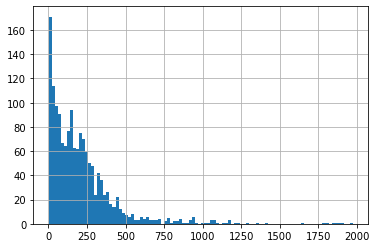

In [76]:
communes.loc[communes['pop_density']<2000, 'pop_density'].hist(bins=100)

In [103]:
cond_pop = communes['population'] > 8000
communes.loc[cond_pop, "population"].sum() / communes['population'].sum()

0.6509905206767375

In [96]:
tt = communes.sort_values('population', ascending=False)['population']
top_n = 700
print(tt.iloc[top_n])
tt.iloc[:top_n].sum() / communes['population'].sum()

7829


0.6627924580473021